In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
from causadb import CausaDB
from causadb.plotting import plot_causal_graph, plot_causal_attributions
import numpy as np
import pandas as pd
import os
import json

client = CausaDB(token=os.environ.get('CAUSADB_TOKEN'))

In [21]:
data = pd.read_csv('production_data.csv')
data.head()

,Input_A,Input_B,Input_C,Config_A1,Config_B1,Config_B2,Config_C1,Config_C2,Yield_A1,Config_A2,Yield_B1,Config_B3,Yield_C1,Yield_A2,Config_A3,Yield_B2,Yield_C2,Yield_A3,Yield_B3,Output
0,84.13,138.19,82.78,0.71,0.19,0.46,0.56,0.60,0.60,0.74,0.42,0.49,0.52,0.74,0.85,0.54,0.51,0.81,0.61,0.88
1,88.05,58.99,92.22,0.67,0.39,0.63,0.49,0.61,0.65,0.72,0.42,0.66,0.45,0.71,0.79,0.61,0.55,0.80,0.70,0.90
2,113.72,111.86,88.28,0.64,0.31,0.51,0.50,0.57,0.60,0.74,0.42,0.52,0.38,0.75,0.80,0.60,0.52,0.84,0.69,0.92
3,102.84,98.40,83.04,0.68,0.56,0.55,0.49,0.61,0.70,0.73,0.56,0.74,0.43,0.76,0.78,0.66,0.55,0.85,0.79,0.95
4,71.45,79.70,110.03,0.71,0.69,0.60,0.37,0.57,0.56,0.77,0.62,0.60,0.49,0.69,1.00,0.72,0.58,0.85,0.78,0.95


In [22]:
client \
  .add_data("example-production-data") \
  .from_pandas(data)

In [23]:
# Load nodes and edges from json files
with open('nodes.json', 'r') as f:
    nodes = json.load(f)

with open('edges.json', 'r') as f:
    edges = json.load(f)

In [24]:
model = client.create_model("example-production-model")
model.set_nodes(nodes)
model.set_edges(edges)

model.train("example-production-data")

In [25]:
plot_causal_graph(model, style="flowchart", theme="dark", direction="LR")

In [29]:
optimal_config = model.find_best_actions(
    targets={"Output": "maximise"},
    actionable=["Config_A1", "Config_A2", "Config_A3", "Config_B1", "Config_B2", "Config_B3", "Config_C1", "Config_C2"],
)

optimal_config.round(2)

,Config_A1,Config_A2,Config_A3,Config_B1,Config_B2,Config_B3,Config_C1,Config_C2
0,0.6,0.73,0.81,0.48,0.73,0.86,0.49,0.75


<Axes: title={'center': 'Causal attribution of Output'}, xlabel='Causal attribution', ylabel='Node'>

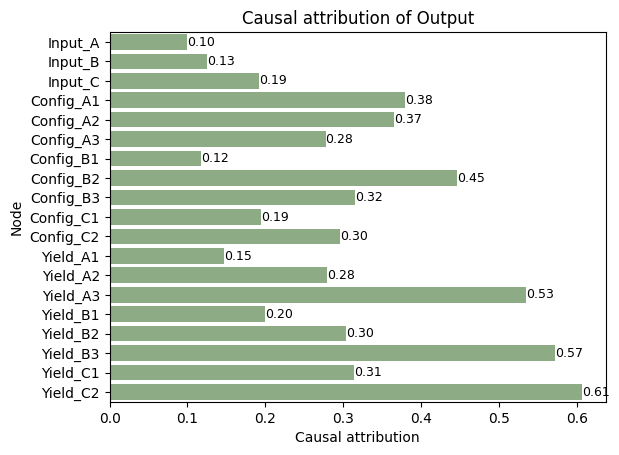

In [30]:
plot_causal_attributions(model, "Output")

In [28]:
# For the write-up:
# Also run using causacore to see the yield of causal ML vs some other method (neural network I reckon)
# Could also do a SHAP comparison vs causal attribution to flesh things out.